<a href="https://colab.research.google.com/github/hardikkamboj/Google-Earth-Engine-Notebooks/blob/main/USE_CASES/Analyzing_cyclone_winston/Analyzing_result.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# unzpipping the images from the folder 
!unzip file.zip

Archive:  file.zip
   creating: content/data/
  inflating: content/data/wx_LANDSAT_LC08_C01_T1_8DAY_NDVI_20160210.time.20160210T000000.tif  
  inflating: content/data/wx_LANDSAT_LC08_C01_T1_8DAY_NDVI_20160218.time.20160218T000000.tif  
  inflating: content/data/wx_LANDSAT_LC08_C01_T1_8DAY_NDVI_20160305.time.20160305T000000.tif  
  inflating: content/data/wx_LANDSAT_LC08_C01_T1_8DAY_NDVI_20160226.time.20160226T000000.tif  


In [ ]:
!pip install --quiet earthpy

     |████████████████████████████████| 1.4 MB 25.8 MB/s 
     |████████████████████████████████| 1.0 MB 71.2 MB/s 
     |████████████████████████████████| 19.3 MB 1.3 MB/s 
     |████████████████████████████████| 6.3 MB 65.4 MB/s 
     |████████████████████████████████| 15.4 MB 50.6 MB/s 


In [ ]:
from glob import glob

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio
from rasterio.plot import show

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

import plotly.graph_objects as go

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:452: UserWarning:


/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:459: UserWarning:


/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:464: UserWarning:


<string>:6: UserWarning:


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: UserWarning:




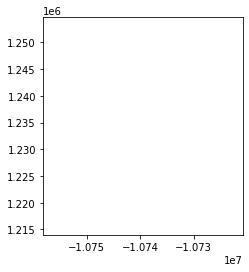

In [ ]:
img1 = rio.open('/content/content/data/wx_LANDSAT_LC08_C01_T1_8DAY_NDVI_20160210.time.20160210T000000.tif')

show(img1)

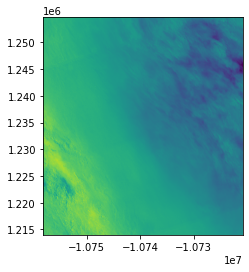

In [ ]:
img2 = rio.open('/content/content/data/wx_LANDSAT_LC08_C01_T1_8DAY_NDVI_20160218.time.20160218T000000.tif')

show(img2)

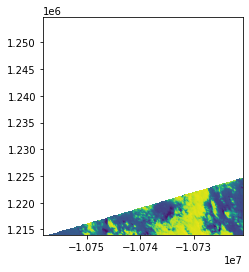

In [ ]:
img3 = rio.open('/content/content/data/wx_LANDSAT_LC08_C01_T1_8DAY_NDVI_20160226.time.20160226T000000.tif')

show(img3)

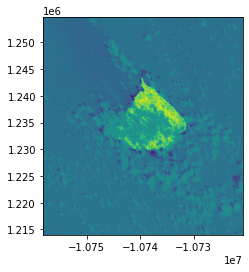

In [ ]:
img4 = rio.open('/content/content/data/wx_LANDSAT_LC08_C01_T1_8DAY_NDVI_20160305.time.20160305T000000.tif')

show(img4)

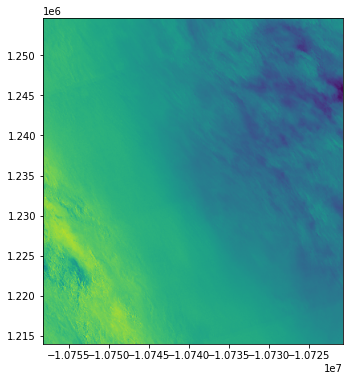

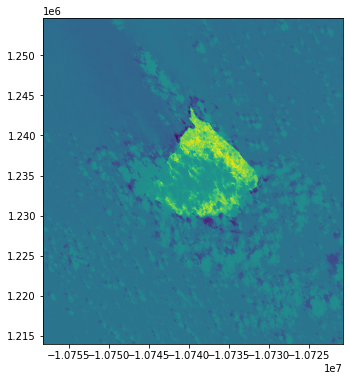

In [ ]:
plt.figure(figsize = (8,6))
show(img2)

plt.figure(figsize= (8,6))
show(img4)